In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
import pandas as pd

In [2]:
data_path = "train.csv"

In [3]:
data = pd.read_csv(data_path)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
'''
encoded_x is used for sex, cabin.
dropped_male_x is used to drop sex_male because we have sex_female series(column) to represent sex.
lastly, we had used fillna to get rid of NAN in age column, and filled with mean of age.
'''
#feature_list = ['PassengerId', 'Pclass', 'Sex', 'Age', 'Cabin']


#feature_list = ['PassengerId', 'Pclass', 'Sex', 'Age']
feature_list = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Cabin', 'Embarked']



X = data[feature_list]

encoded_x = pd.get_dummies(X)

y = data.Survived

dropped_male_x = encoded_x.drop(['Sex_male'], axis = 1)

filled_x = dropped_male_x.fillna(dropped_male_x.mean())


In [69]:
X_train, X_test, y_train, y_test = train_test_split(filled_x, y, random_state = 0)

In [70]:
model = GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [71]:
model = model.fit(X_train, y_train)

In [72]:
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.8340807174887892

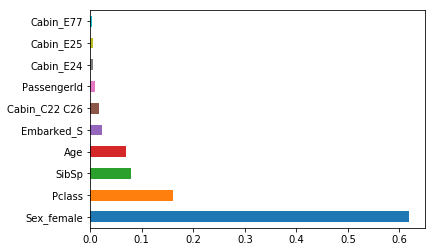

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
feat_importances = pd.Series(model.feature_importances_, index=filled_x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

(223, 152)